In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import os
import pathlib
from rsbeams.rsdata.SDDS import readSDDS
from rsbeams.rsplot import beam_plots

In [3]:
datapath = pathlib.Path('./data/plotting_elegant')

In [4]:
# Run elegant to generate example data
os.system(f"cd {datapath}; python bunchComp-fourDipoleCSR.py")

Running elegant at Mon May  1 22:10:06 2023

This is elegant 2021.1.0, Jun 14 2022, by M. Borland, J. Calvey, M. Carla', N. Carmignani, M. Ehrlichman, L. Emery, W. Guo, R. Lindberg, V. Sajaev, R. Soliday, Y.-P. Sun, C.-X. Wang, Y. Wang, Y. Wu, and A. Xiao.
Thanks for using elegant.  Please cite the following reference in your publications:
  M. Borland, "elegant: A Flexible SDDS-Compliant Code for Accelerator Simulation,"
  Advanced Photon Source LS-287, September 2000.
If you use a modified version, please indicate this in all publications.
Link date: Jun 14 2022 16:11:55, SVN revision: unknown
statistics:    ET:     00:00:00 CP:    0.00 BIO:0 DIO:0 PF:0 MEM:5937
&global_settings
    inhibit_fsync = 0,
    echo_namelists = 1,
    mpi_randomization_mode = 3,
    exact_normalized_emittance = 0,
    SR_gaussian_limit = 3.000000000000000e+00,
    inhibit_seed_permutation = 0,
    log_file = {NULL},
    error_log_file = {NULL},
    share_tracking_based_matrices = 1,
    parallel_tracking_b

0

# elegant Plotting Utilities

## Read SDDS Data

In [5]:
# Read the distribution at the simulation end
end = readSDDS(datapath.joinpath('run_setup.output.sdds'))
end.read()

# Read sigma file
sig_file = readSDDS(datapath.joinpath('run_setup.sigma.sdds'))
sig_file.read()

# Read Twiss file
twiss_file = readSDDS(datapath.joinpath('twiss_output.filename.sdds'))
twiss_file.read()

## elegant SDDS Data

### Parameters
Parameter data is scalar data stored in structured NumPy arrays. If the file has more than 1 page then each page will be a row in the parameter array.

In [6]:
twiss_file.parameters

array([[(236, 0, 0.24561799, 0.0294858, 0., 0., 0., -1.79769313e+308, 0.59546634, 0.01167518, 0., 0., 0., -1.79769313e+308, 0., 0.24561799, 0.24561799, 0.59546634, 0.59546634, 'tunes corrected', 107.60000224, 36.79455018, -144.31529553, 0.18526475, 0.07335729, 0., 0., 0., 0., 0., 0., 0., 0., 10., 38.42696121, 97.22971021, 0.52840979, 223.3253229, 987.0614166, 0.14285804, 0., 1, 1, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -0.34984834, 0., 0.00014753, -0.00031866)]],
      dtype=[('row_counts', '<i4'), ('Step', '<i4'), ('nux', '<f8'), ('dnux/dp', '<f8'), ('dnux/dp2', '<f8'), ('dnux/dp3', '<f8'), ('Ax', '<f8'), ('AxLocation', '<f8'), ('nuy', '<f8'), ('dnuy/dp', '<f8'), ('dnuy/dp2', '<f8'), ('dnuy/dp3', '<f8'), ('Ay', '<f8'), ('AyLocation', '<f8'), ('deltaHalfRange', '<f8'), ('nuxChromUpper', '<f8'), ('nuxChromLower', '<f8'), ('nuyChromUpper', '<f8'), ('nuyChromLower', '<f8'), ('Stage', '<U100'), ('pCentral', '<f8'), ('dbetax/dp', '<f8'), ('dbetay/dp', '<f8'), ('dalphax/

In [7]:
# To see a summary of the available parameters
for par in twiss_file.parameters.dtype.names:
    print(par)

row_counts
Step
nux
dnux/dp
dnux/dp2
dnux/dp3
Ax
AxLocation
nuy
dnuy/dp
dnuy/dp2
dnuy/dp3
Ay
AyLocation
deltaHalfRange
nuxChromUpper
nuxChromLower
nuyChromUpper
nuyChromLower
Stage
pCentral
dbetax/dp
dbetay/dp
dalphax/dp
dalphay/dp
etax2
etay2
etax3
etay3
etaxp2
etayp2
etaxp3
etayp3
betaxMin
betaxAve
betaxMax
betayMin
betayAve
betayMax
etaxMax
etayMax
waistsx
waistsy
dnux/dAx
dnux/dAy
dnuy/dAx
dnuy/dAy
dnux/dAx2
dnux/dAy2
dnux/dAxAy
dnuy/dAx2
dnuy/dAy2
dnuy/dAxAy
nuxTswaLower
nuxTswaUpper
nuyTswaLower
nuyTswaUpper
couplingIntegral
couplingDelta
emittanceRatio
alphac2
alphac


In [8]:
# Individual columns can be accessed by their key
twiss_file.parameters['betaxMax']

array([[97.22971021]])

In [9]:
# Descriptions and other data stored in the SDDS file header can be accessed with with methods of the SDDS data class
print("Parameter description:", twiss_file.parameter_description('nux'))
print("Parameter units:", twiss_file.parameter_units('nux'))
print("Parameter symbol:", repr(twiss_file.parameter_symbol('nux')))

Parameter description: Horizontal tune
Parameter units: 1/(2$gp$r)
Parameter symbol: '$gn$r$bx$n'


### Columns
Column data is 1D vector data. It is accessed in a similar manner to parameters.

In [10]:
twiss_file.columns[:, :4]

array([[(0. , 10.       , 1.        , 0.        , 0., 0., 10., 10.       , 1.        , 0.        , 0., 0., 10., 107.60000224, '_BEG_', 1, 'MARK', ''),
        (0. , 10.       , 1.        , 0.        , 0., 0., 10., 10.       , 1.        , 0.        , 0., 0., 10., 107.60000224, 'Q', 1, 'CHARGE', '?'),
        (0.3, 10.1662736, 0.94220014, 0.02975121, 0., 0., 10., 10.1662736, 0.94220014, 0.02975121, 0., 0., 10., 115.89418261, 'LINA10', 1, 'RFCA', '?'),
        (0.3, 10.1662736, 0.94220014, 0.02975121, 0., 0., 10., 10.1662736, 0.94220014, 0.02975121, 0., 0., 10., 115.89418261, 'ZWAKE', 1, 'WAKE', '?')]],
      dtype=[('s', '<f8'), ('betax', '<f8'), ('alphax', '<f8'), ('psix', '<f8'), ('etax', '<f8'), ('etaxp', '<f8'), ('xAperture', '<f8'), ('betay', '<f8'), ('alphay', '<f8'), ('psiy', '<f8'), ('etay', '<f8'), ('etayp', '<f8'), ('yAperture', '<f8'), ('pCentral0', '<f8'), ('ElementName', '<U100'), ('ElementOccurence', '<i4'), ('ElementType', '<U100'), ('ChamberShape', '<U100')])

Fields in the array are accessed in a similar manner. Shown here is a smiple plot from the column data.

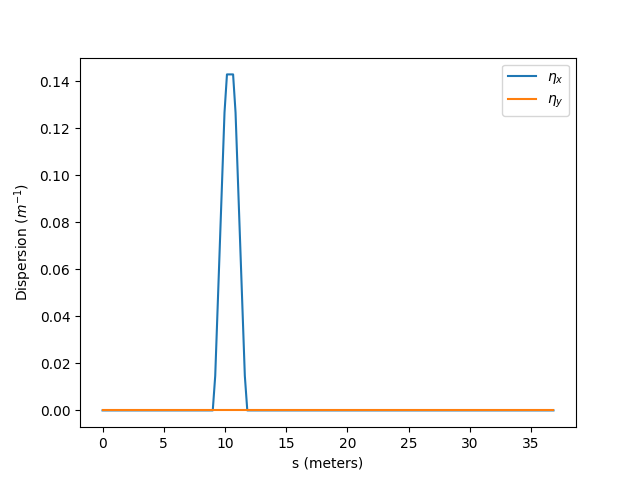

In [11]:
plt.figure()

twiss_columns = twiss_file.columns.squeeze()

plt.plot(twiss_columns['s'], twiss_columns['etax'], label=r'$\eta_x$')
plt.plot(twiss_columns['s'], twiss_columns['etay'], label=r'$\eta_y$')
plt.legend()
plt.xlabel('s (meters)')
plt.ylabel('Dispersion ($m^{-1}$)')
plt.show()

## Phase Space Plots
There are also several builtin plotting utilities in rsbeams for making pre-formatted plots from elegant output.

### Final Longitudinal Phase Space

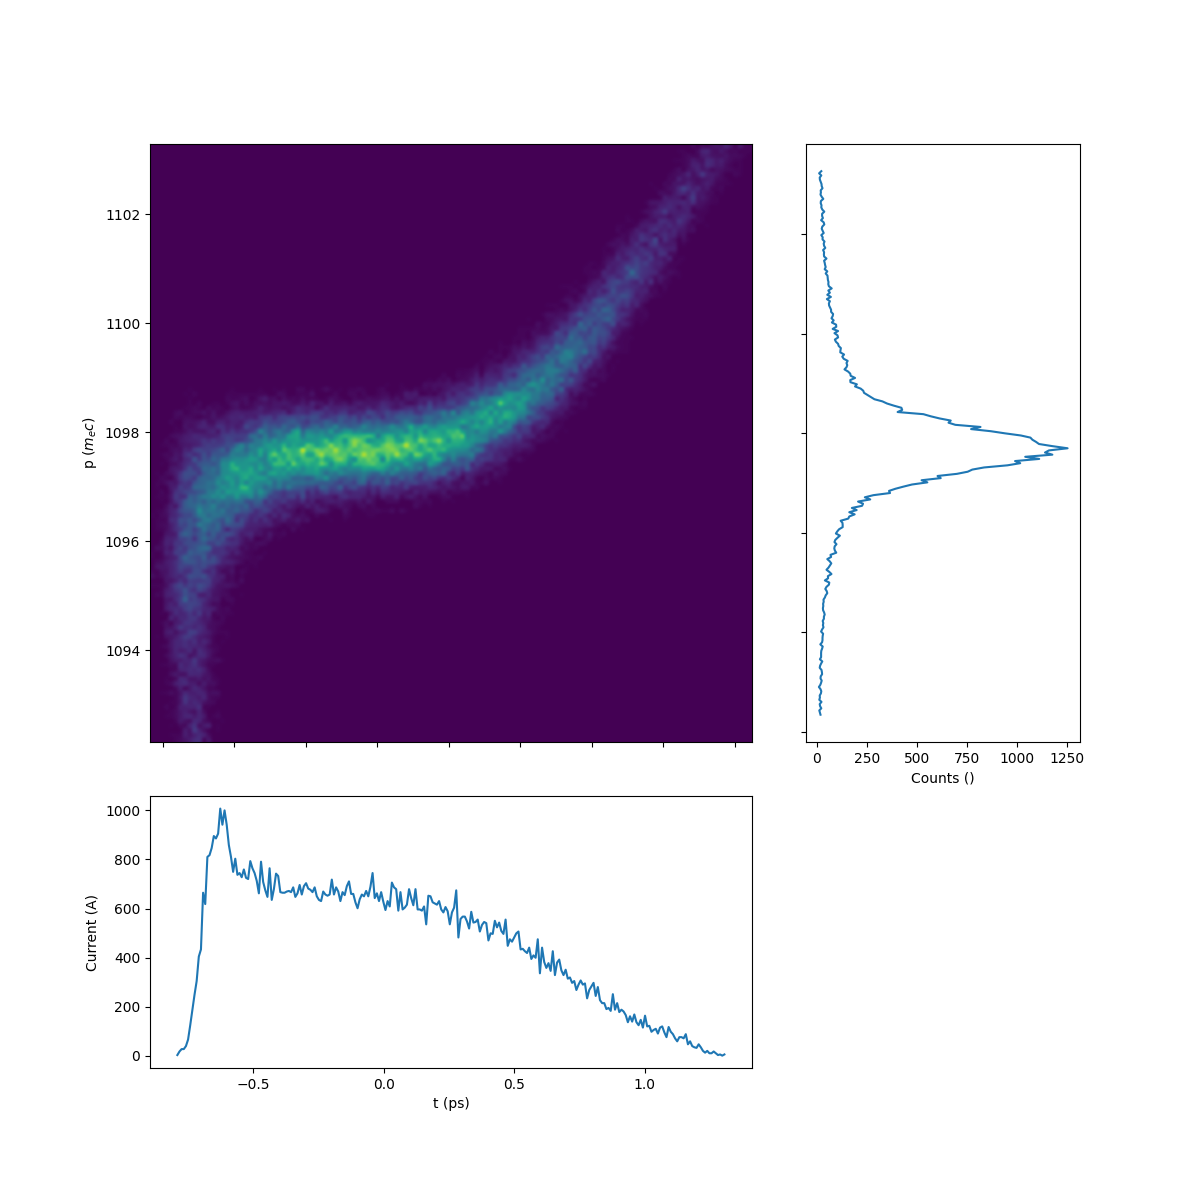

In [12]:
beam_plots.longitudinal_phase_space(end)

### Final Horizontal Phase Space

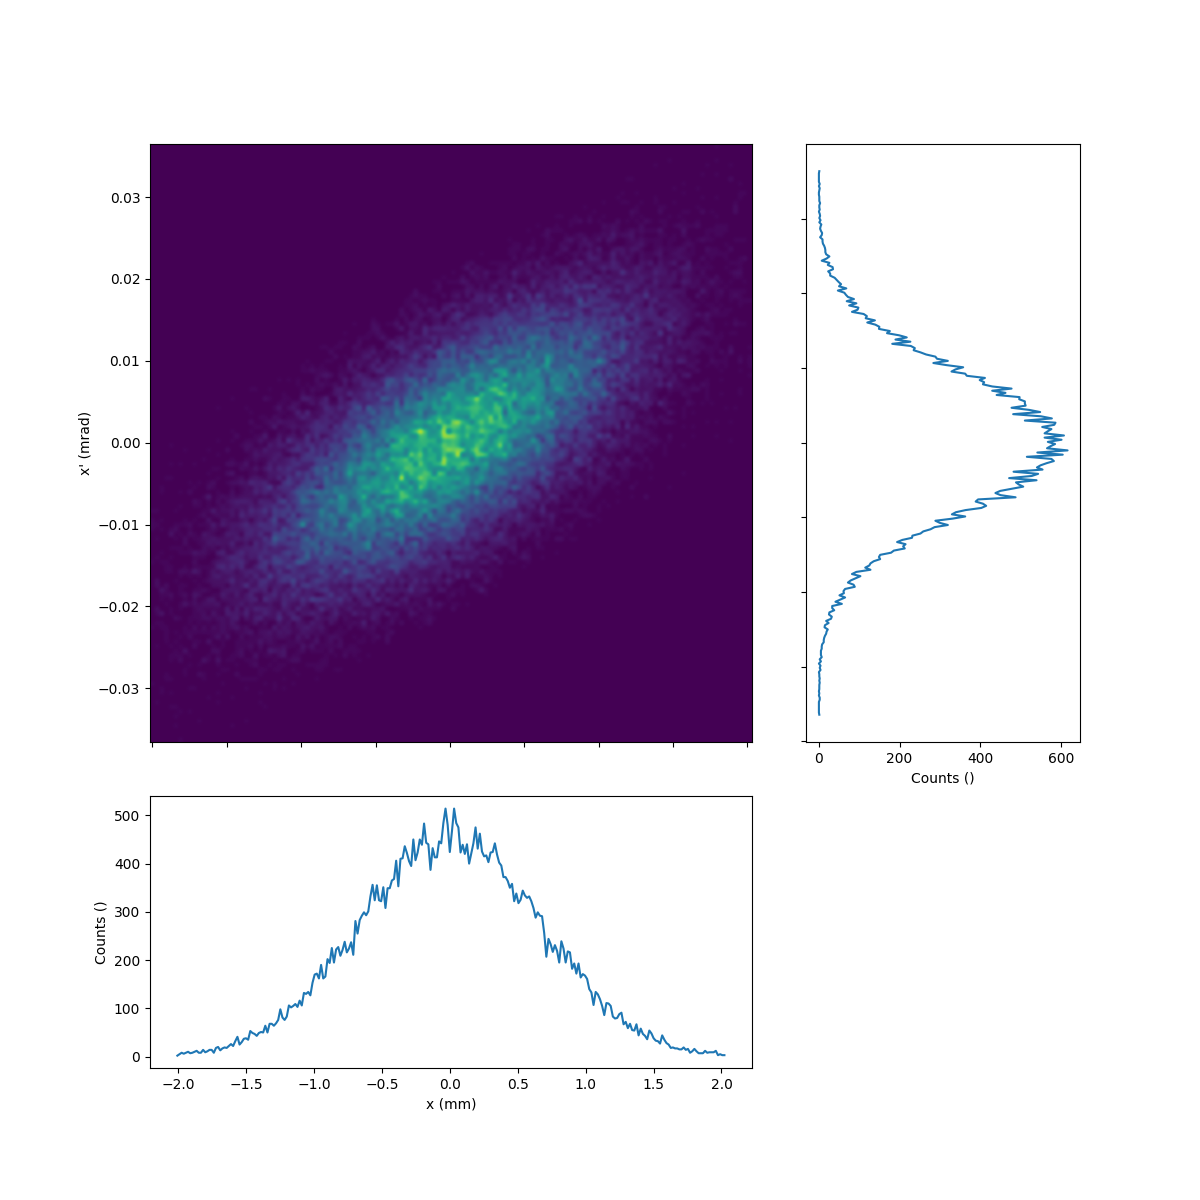

In [13]:
beam_plots.horizontal_phase_space(end)

### Final bunch projections

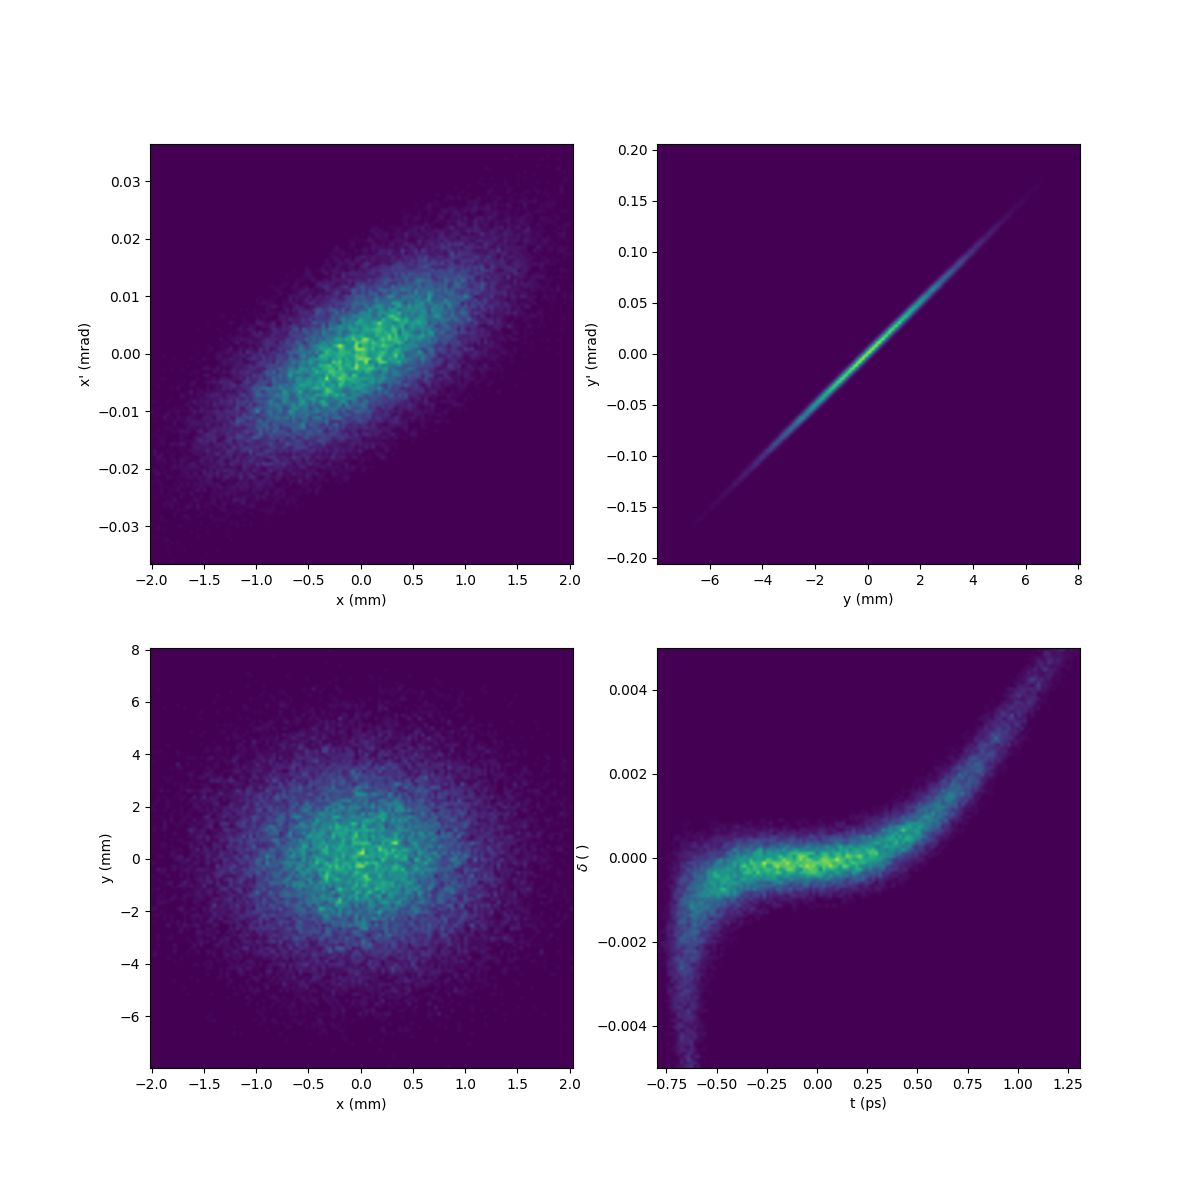

In [14]:
beam_plots.phase_space(end)

## Beamline Plots

### Transverse RMS Beam Size
The outline above the plot shows the position and type of magnetic elements along the beamline.

- Orange: RF cavities
- Red: Dipole Magnets

The dipole magnets make up the magnetic compression chicane used to shorten the length of the electron bunch, increasing the peak current to improve FEL performance.

In [18]:
beam_plots.beamline_profile?

Signature:
beam_plots.beamline_profile(
    sdds,
    page=0,
    quantities=None,
    xlim=None,
    ylim=None,
    save=None,
)
Docstring:
Plot quantities vs position.

Args:
    sdds: Open SDDS file from rsbeams.rsdata.readSDDS
    page: [0] Page number in SDDS file to plot from.
    quantities: (list) List of quantities to place on plot.
    xlim: (tuple) (min, max) Manually set plot range in x.
    ylim: (tuple) (min, max) Manually set plot range in y.
    save: (str) Path to file (with extension) to save plot.
File:      ~/.pyenv/versions/py3/lib/python3.7/site-packages/rsbeams/rsplot/beam_plots.py
Type:      function


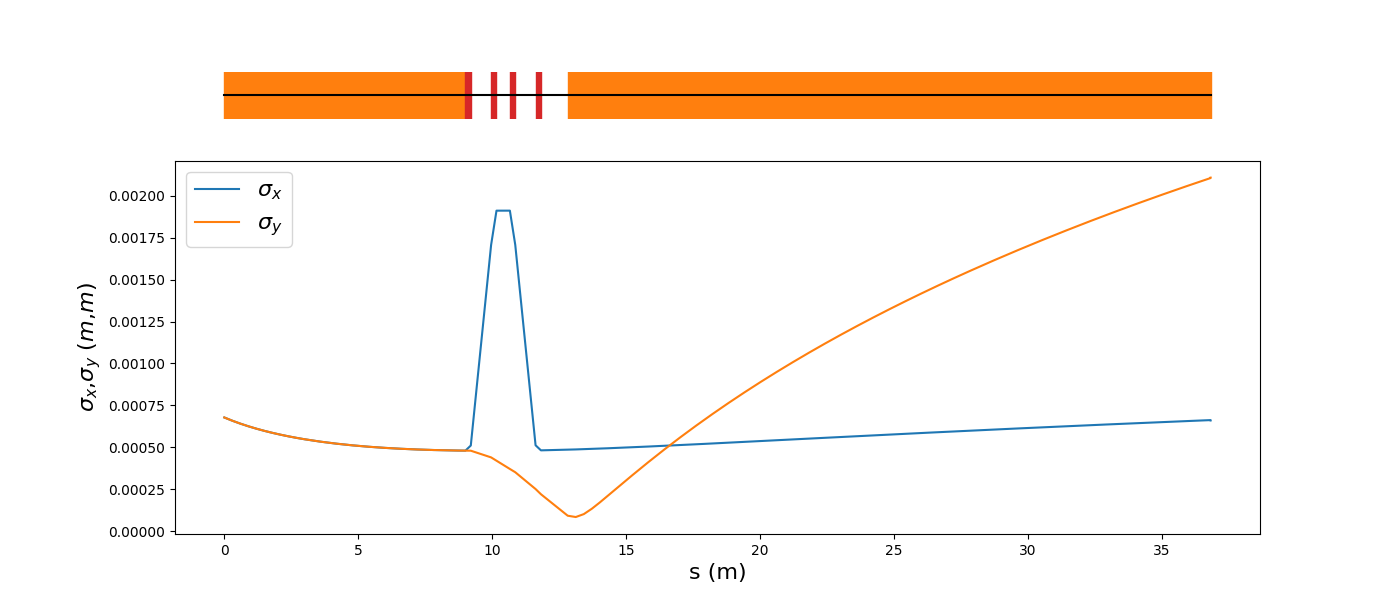

In [15]:
beam_plots.beamline_profile(sig_file, quantities=['Sx', 'Sy',])

### RMS bunch length
Goes down, so the chicane is working

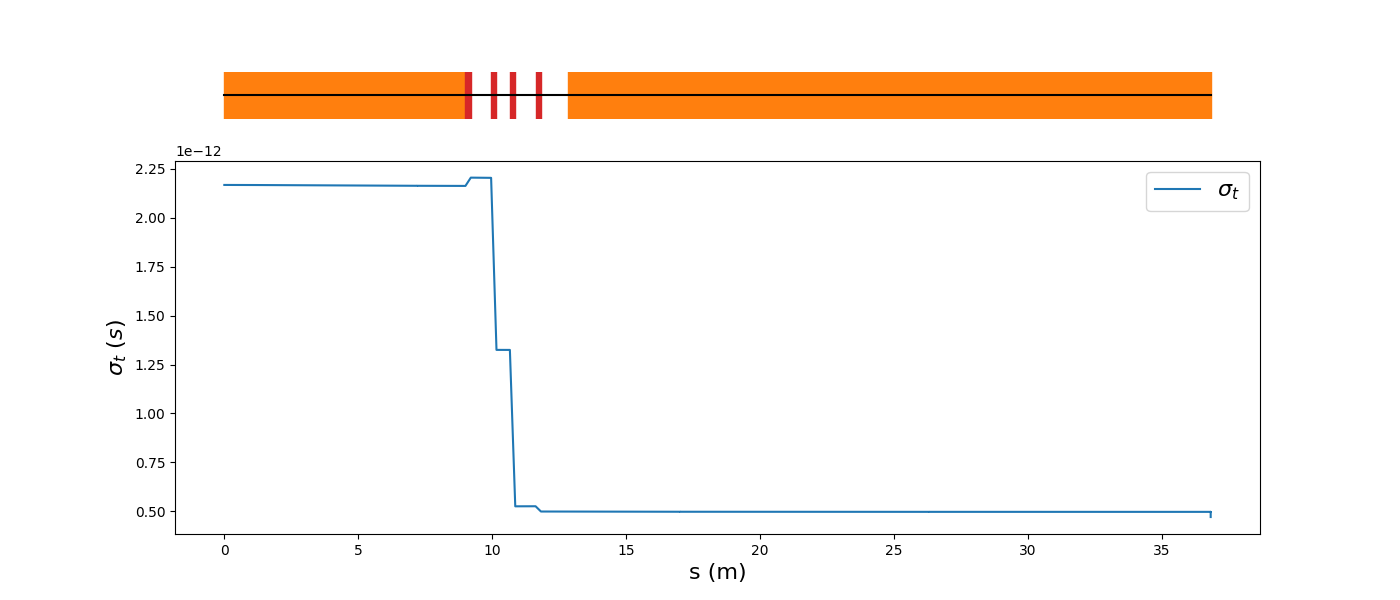

In [16]:
beam_plots.beamline_profile(sig_file, quantities=['St',])

### Normalized Emittance

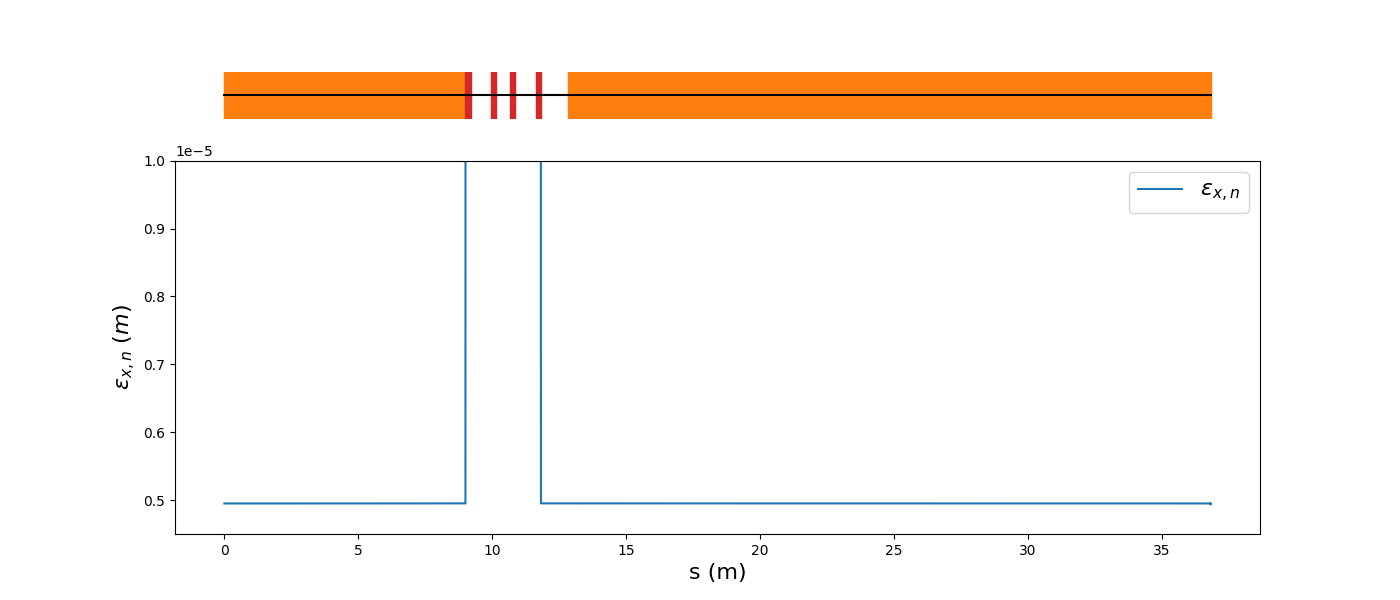

In [17]:
beam_plots.beamline_profile(sig_file, quantities=['enx',], ylim=(4.5e-6, 10e-6))